# 12.2.1. Power Spectral Density


> @djuric2018cooperative 의 Chap 12.2.1, Chap 12.3

**Definition 12.3.** The PSD of a random process ${\bf x}$ that is stationary with respect to GSO ${\bf S}={\bf V}{\bf \Lambda}{\bf V}^H$ is the nonnegative $N \times 1$ vector ${\bf p}$ 

$${\bf p}:=\text{diag}\big({\bf V}^H {\bf C}_{\bf x}{\bf V} \big).$$

OversObserve that because ${\bf C}_{\bf x}$ is diagonalized by ${\bf V}$ the matrix ${\bf V}^H{\bf C}_{\bf x}{\bf V}$ is diagonal and it follows that the PSD in above equation corresponds to the eigenvalues of the positive semidefinite covariance matrix ${\bf C}_{\bf x}$. Thus, above equation is equivalent to

$${\bf C}_{\bf x}={\bf V}\text{diag}({\bf p}){\bf V}^H.$$

Zero-mean white noise is an example of a random process that is stationary with respect to any graph shift ${\bf S}$. The PSD of white noise with covariance $\mathbb{E}[{\bf n}{\bf n}^H] = \sigma^2{\bf I}$ is ${\bf p} = \sigma^2{\bf 1}$^[${\bf 1}$ is length $N$ vector with all elements are 1]. Also notice that, by definition, any random process ${\bf x}$ is stationary with respect to the shift ${\bf S} = {\bf C}_{\bf x}$ defined by its covariance matrix, with corresponding PSD ${\bf p} = \text{diag}({\bf \Lambda})$. This can be exploited in the context of network topology inference. Given a set of graph signals $\{{\bf x}_r\}_{r=1}^R$ it is common to infer the underlying topology by building a graph ${\cal G}_{corr}$ whose edge weights correspond to cross-correlations among the entries of the signals. In that case, the process generating those signals is stationary in the shift given by the adjacency of ${\cal G}_{corr}$; see @segarra2017network for details. A random process x is also stationary with respect to the shift given by its precision matrix, which is defined as the (pseudo-)inverse ${\bf \Theta}= {\bf C}^{\dagger}_{\bf x}$. The PSD, in this case, is ${\bf p} = \text{diag}(\Lambda)^{\dagger}$. This is particularly important when ${\bf x}$ is a Gaussian Markov Random Field (GMRF) whose Markovian dependence is captured by the unweighted graph ${\cal G}_{MF}$. It is well known @segarra2017network Ch. 19 that in these cases ${\bf \Theta}_{i,j}$ can be nonzero only if $(i,j)$ is either a link of ${\cal G}_{MF}$ , or an element in the diagonal. Thus, any GMRF is stationary with respect to the sparse shift ${\bf S} = {\bf 
\Theta}$, which captures the conditional dependence between the elements of ${\bf x}$.
Two important properties that hold for random processes in time can be shown to be true as well for the PSD of graph processes.

**Property 12.1** Let ${\bf x}$ be stationary in ${\bf S}$ with covariance ${\bf C}_{\bf x}$ and PSD ${\bf p}_x$. Consider a filter ${\bf H}$ with frequency response $\tilde{\bf h}$ and define ${\bf y}:={\bf H}{\bf x}$. Then, the process ${\bf y}$: 

(a) Is stationary in ${\bf S}$ with covariance ${\bf C}_{\bf y}= {\bf H}{\bf C}_{\bf x}{\bf H}^H$. 

(b) Has a PSD given by ${\bf p}_{\bf y}=|\tilde{\bf h}|^2 \circ {\bf p}_{\bf x}$, where $|\cdot|^2$ is applied elementwise. 

**Property 12.2** Given a process ${\bf x}$ stationary in ${\bf S}={\bf V}{\bf \Lambda}{\bf V}^H$ with PSD ${\bf p}$, define the GFT process as $\tilde{\bf x}={\bf V}^H{\bf x}$. Then, it holds that $\tilde{\bf x}$ is uncorrelated and its covariance matrix is 

$${\bf C}_{\tilde{\bf x}}:= \mathbb{E}\left[\tilde{\bf x}\tilde{\bf x}^H \right]=\mathbb{E}\left[({\bf V}^H{\bf x})({\bf V}^H{\bf x})^H \right]=\text{diag}({\bf p}).$$

Property 12.1 is a statement of the spectral convolution theorem for graph signals. Property 12.2 is fundamental to motivate the analysis and modeling of stationary graph processes in the frequency domain, which we undertake in the remainder of this chapter. It also shows that if a process ${\bf x}$ is stationary in the shift ${\bf S} = {\bf V}{\bf \Lambda}{\bf V}^H$, then the GFT ${\bf V}^H$ provides the Karhunen-Loève expansion of the process.

The concept of stationarity and, consequently, that of PSD can be extended to processes defined jointly in a graph and over time. Before we review this extension in the ensuing section, we discuss requirements on the first moment of stationary graph processes.

**The mean of stationary graph processes**. While Definitions 12.1 and 12.2 assume that the random process ${\bf x}$ has mean $\tilde{\bf x} := \mathbb{E}[{\bf x}] = {\bf 0}$, traditional stationary time processes are allowed to have a (nonzero) constant mean $\bar{\bf x} = \alpha{\bf 1}$, with $\alpha$ being an arbitrary scalar. Stationary graph processes, by contrast, are required to have a first-order moment of the form $\bar{\bf x} = \alpha {\bf v}_k$, i.e., a scaled version of an eigenvector of ${\bf S}$. This choice: (i) takes into account the structure of the underlying graph; (ii) maintains the validity of Property 12.1; and (iii) encompasses the case ${\bf v}_k = {\bf 1}$ when ${\bf S}$ is either the adjacency matrix of a directed cycle or the Laplacian of any graph, recovering the classical first-order requirement for weak stationarity.

# 12.3. Power Spectral Density Estimators 

We can exploit the fact that ${\bf x}$ is a stationary graph process in ${\bf S} = {\bf V}\text{diag}({\bf \Lambda}){\bf V}^H$ to design efficient estimators of the covariance ${\bf C}_{\bf x}$. In particular, instead of estimating ${\bf C}_{\bf x}$ directly, which has $N(N + 1)/2$ degrees of freedom, one can estimate ${\bf p}$ first, which only has $N$ degrees of freedom, and then leverage that ${\bf C}_{\bf x} = {\bf V}\text{diag}({\bf p}){\bf V}^H$.
Motivated by this, the focus of this section is on estimating ${\bf p}$, the PSD of a stationary random graph process ${\bf x}$, using as input either one or a few realizations $\{{\bf x}_r\}_{r=1}^R$ of ${\bf x}$. To illustrate the developments in Sections 12.3 and 12.4, we will use as a running example a random process defined on the well-known Zachary’s Karate club network @zachary1977information (Figs. 12.3 and 12.4). As shown in Fig. 12.4, this graph consists of 34 nodes or members of the club and 78 undirected edges symbolizing friendships among members.2


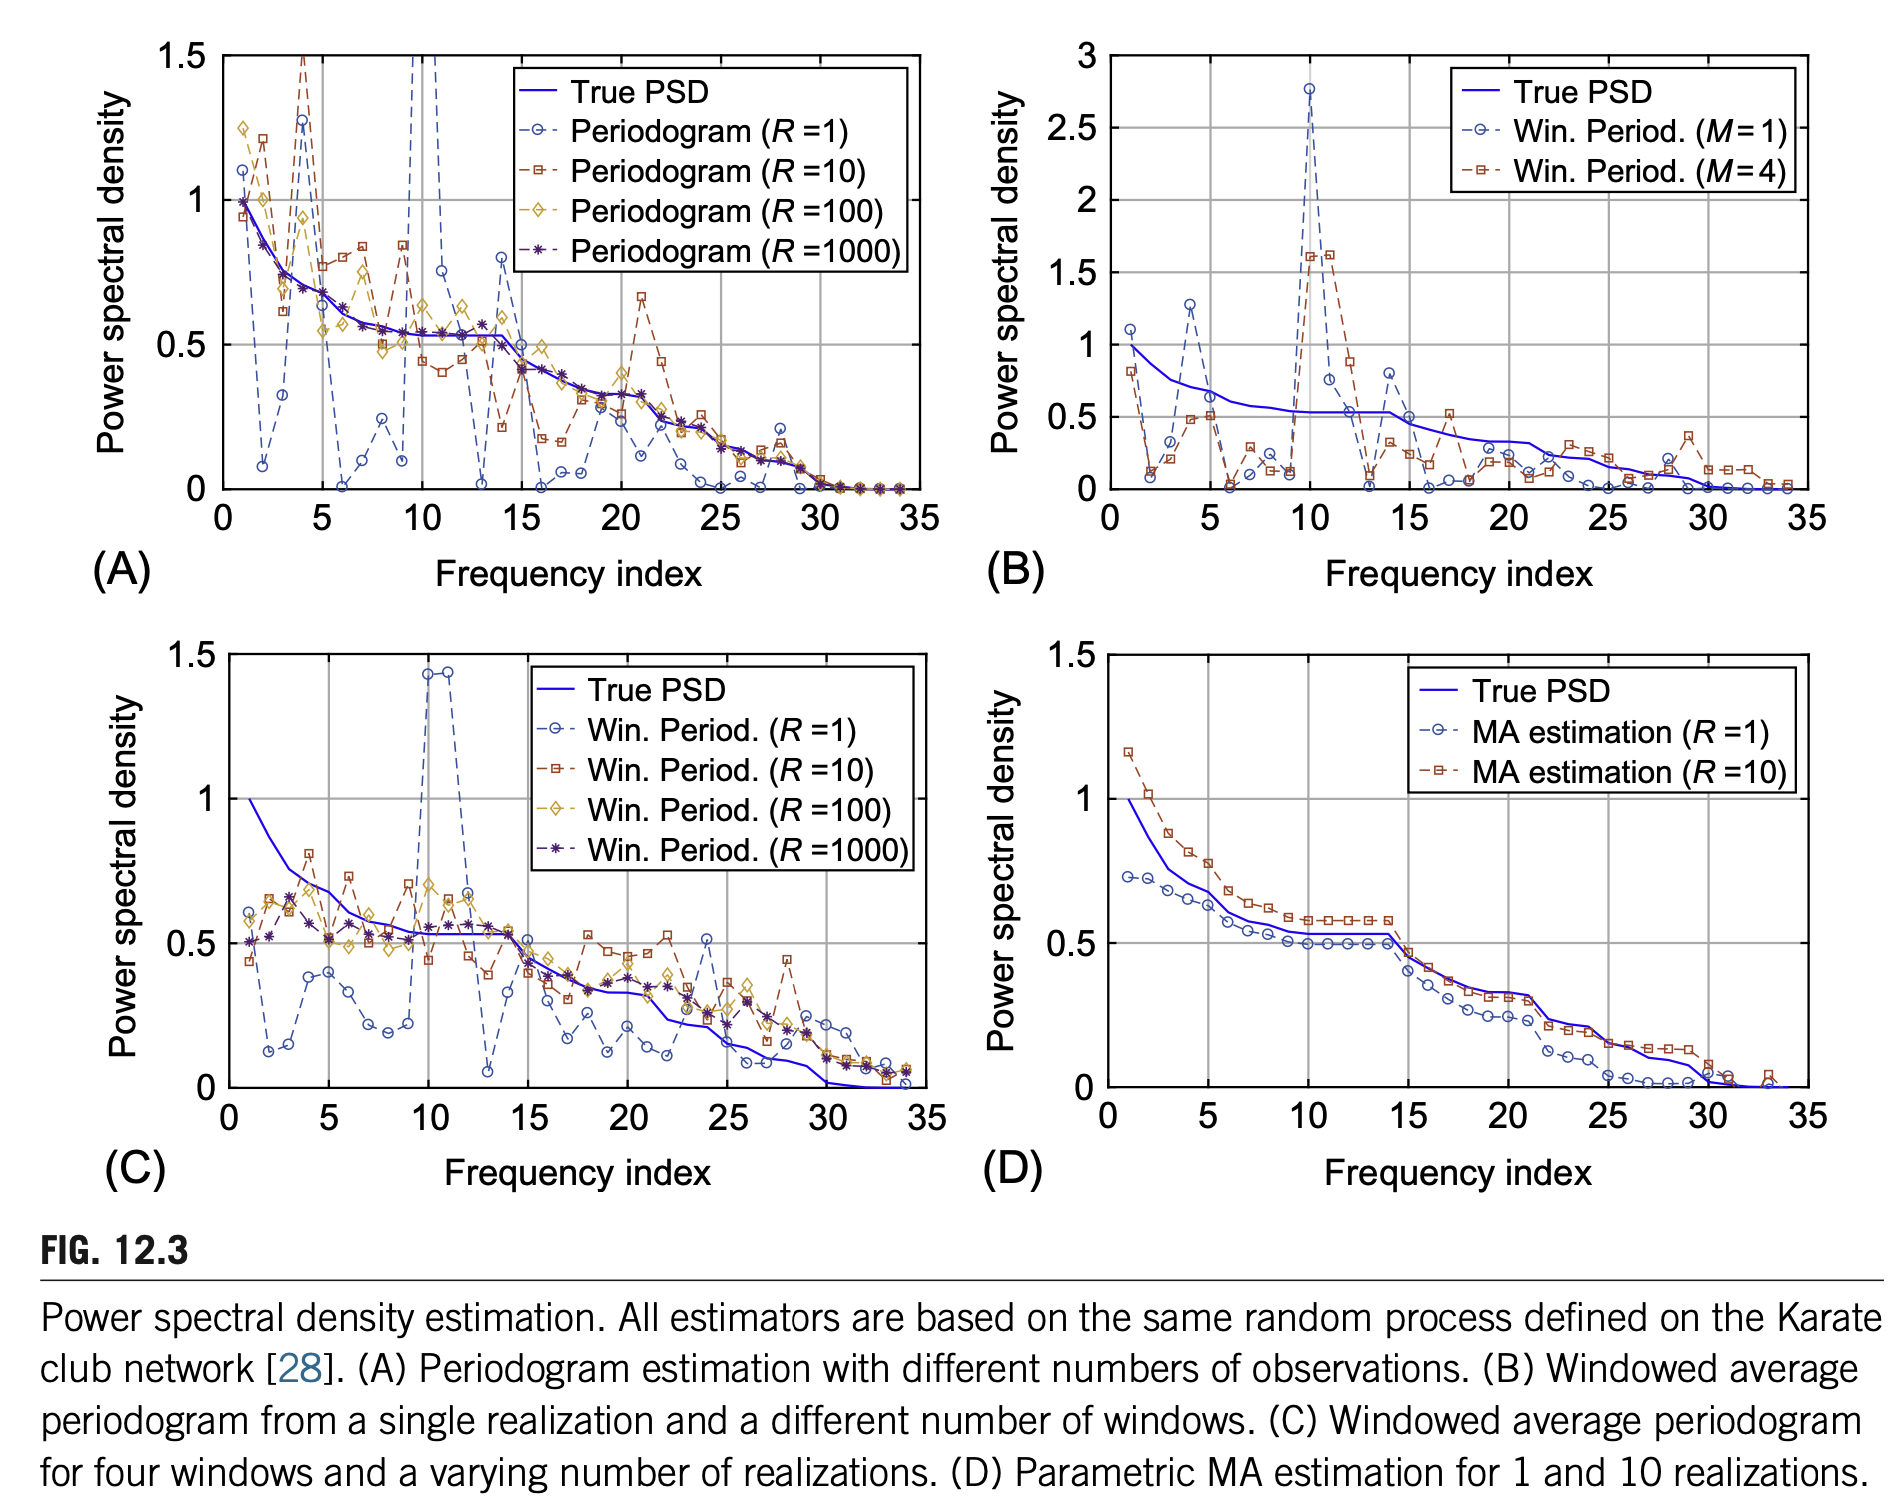

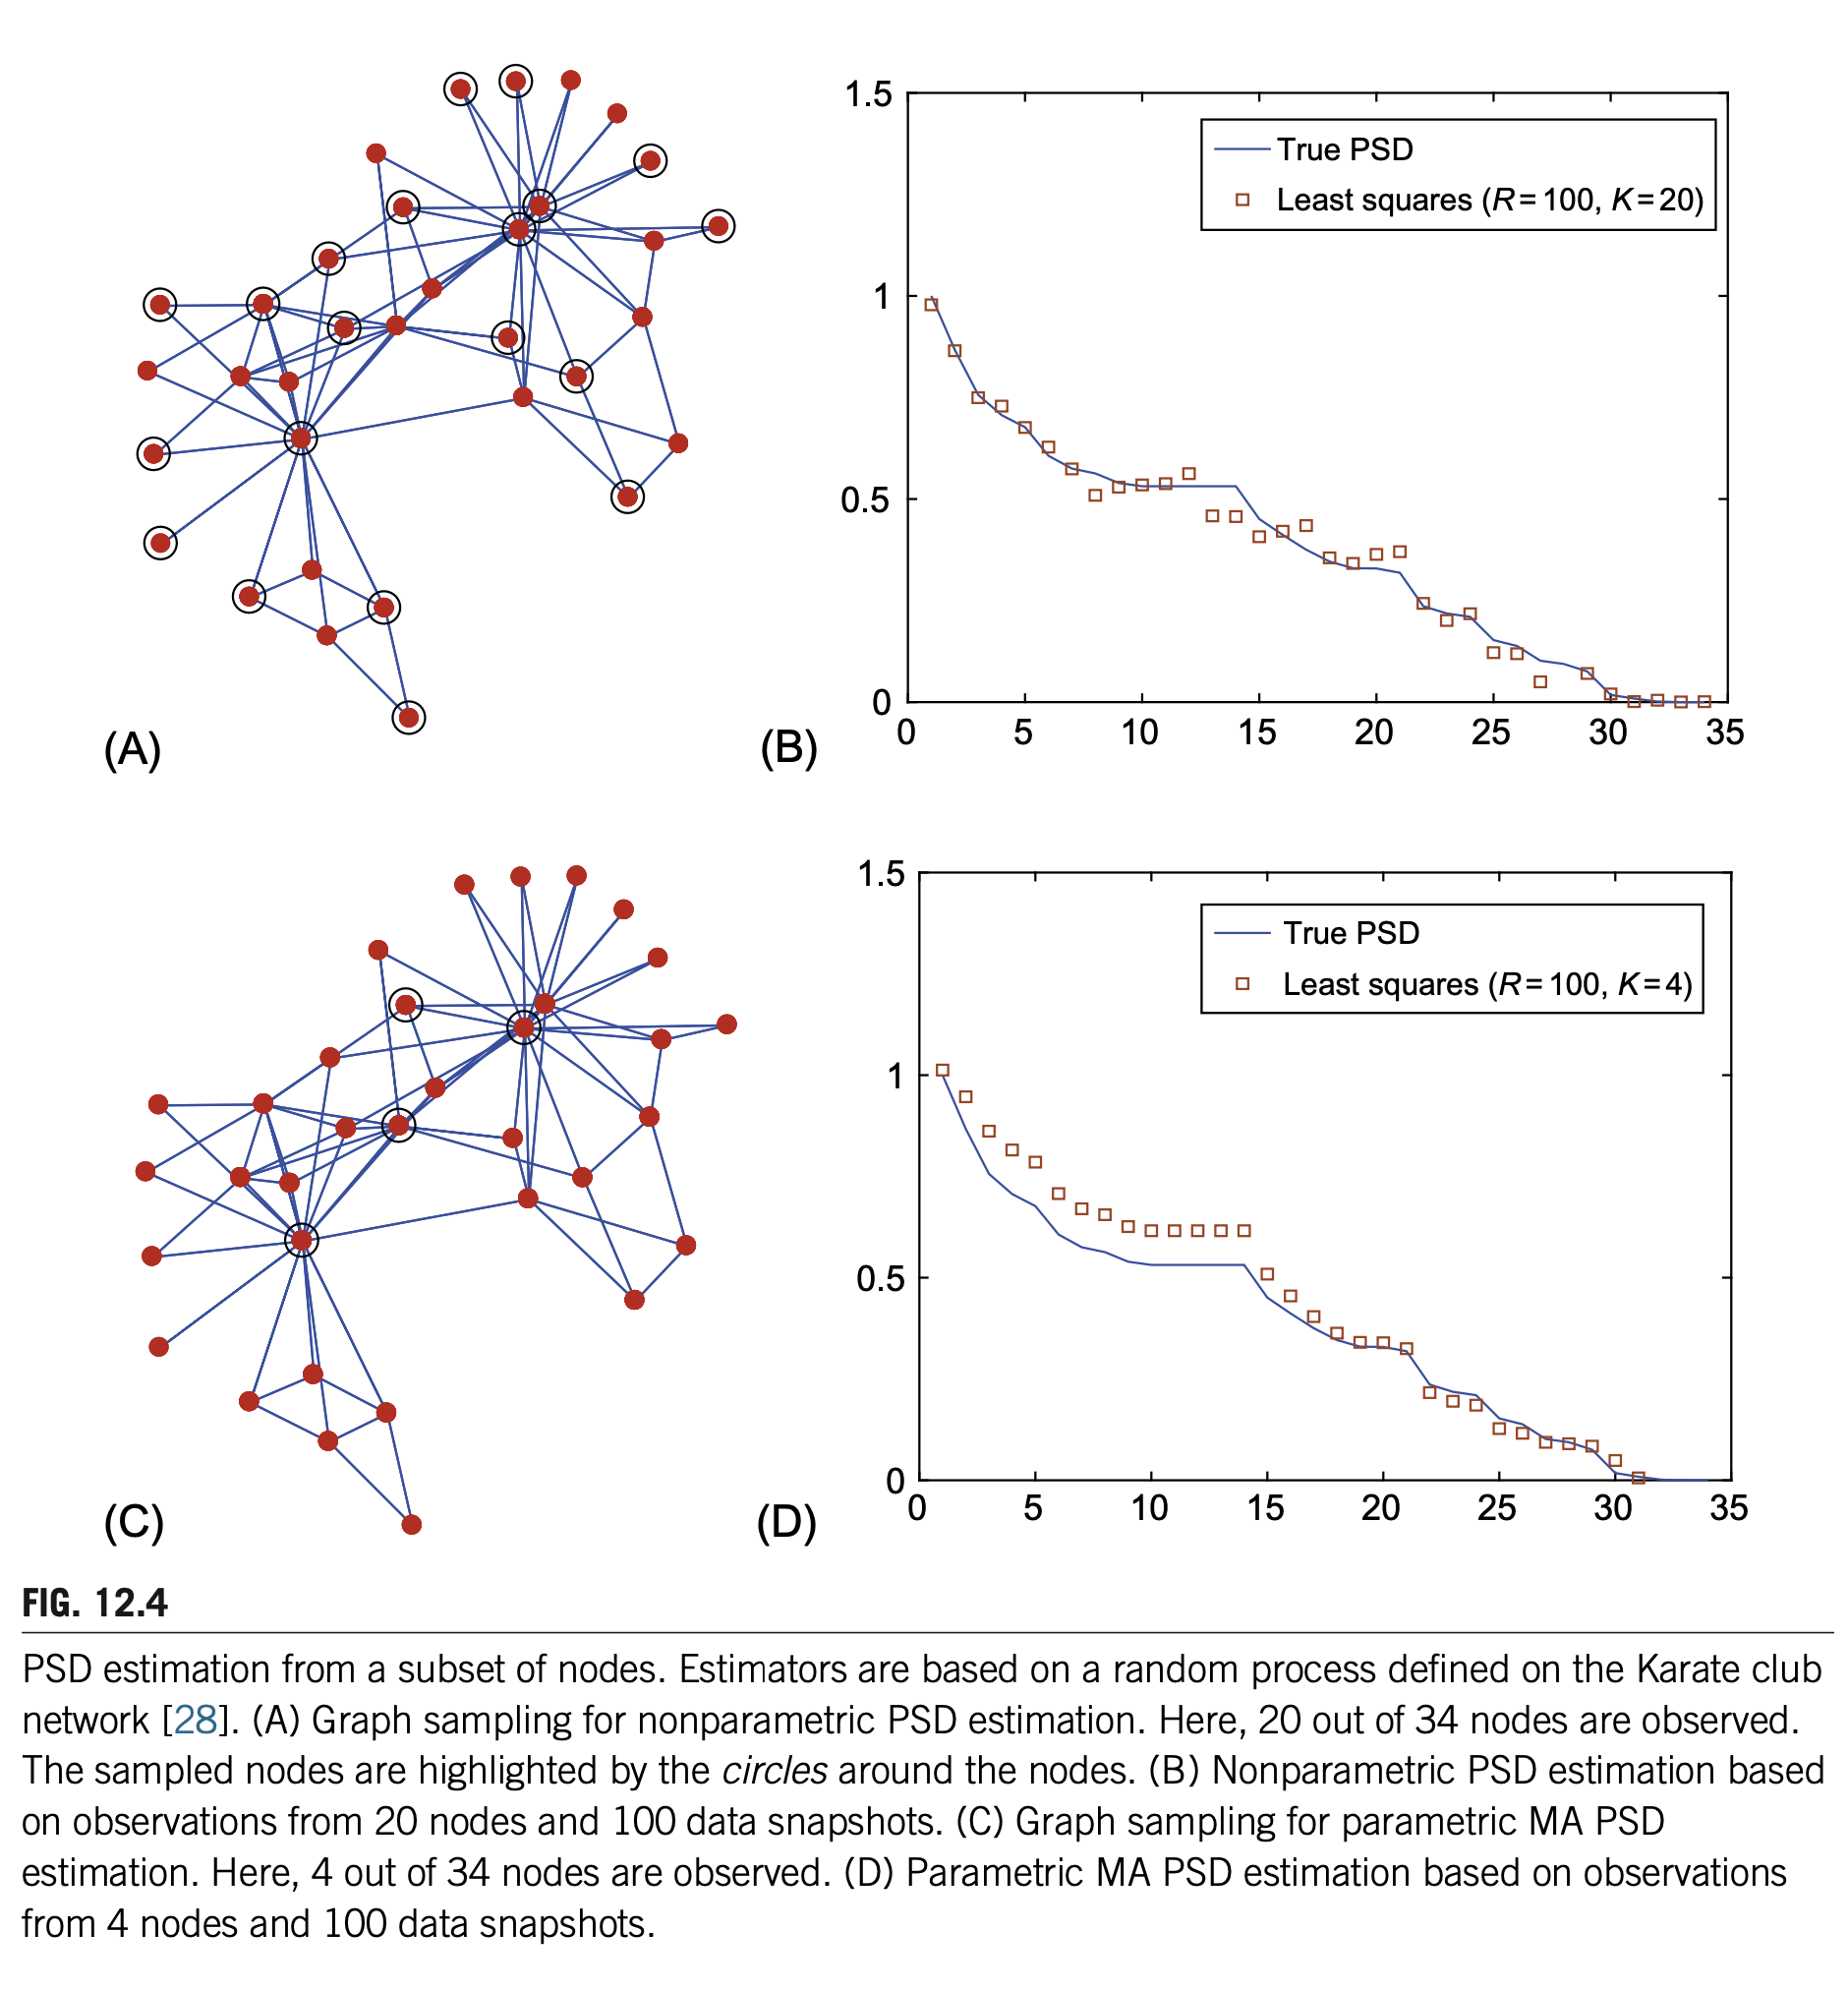

# Summary 

ㅁㄴㅇㄹ